In [9]:
!pip install openpyxl plotly pandas

In [87]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [128]:
file_url = 'https://raw.githubusercontent.com/Sakuljai/BEMM464/main/Deliveroo_Mock_HR_Dataset.xlsx'
data = pd.read_excel(file_url, engine='openpyxl')

In [130]:
data

,Month,Rider Count,Rider Satisfaction (%),Turnover Rate (%),Time to Onboard (days),Offer Acceptance Rate (%),Training Completion (%),Time to Competence (days),Pay Equity Gap (%),Average Weekly Earnings (£)
0,Jan,134000,82.5,66,7,63,50,19,16,310
1,Feb,135000,83.0,65,6,65,55,18,15,320
2,Mar,136500,84.0,67,6,67,58,17,14,325
3,Apr,138000,84.5,70,7,66,60,16,13,330
4,May,139000,85.0,68,6,68,62,15,13,335
5,Jun,140000,85.0,66,5,70,65,14,12,340
6,Jul,141000,85.5,64,5,72,68,13,12,345
7,Aug,142000,85.7,62,5,74,70,12,11,350
8,Sep,143000,86.0,61,4,75,72,11,10,355
9,Oct,144000,86.2,60,4,77,75,10,10,360


In [132]:
kpi_sections = {
    "Recruitment Overview": {
        "Time to Onboard (days)": [6, 3],
        "Offer Acceptance Rate (%)": [65, 85]
    },
    "Reward & Pay Gap Analysis": {
        "Pay Gap (%)": [15, 5],
        "Earnings (£/week)": [320, 400]
    },
    "Training Performance": {
        "Completion Rate (%)": [55, 90],
        "Time to Competence (days)": [18, 10]
    }
}

fig = make_subplots(rows=2, cols=3, 
                    specs=[[{}, {}, {}], [{"colspan": 3}, None, None]],
                    subplot_titles=["Recruitment Overview", "Reward & Pay Gap Analysis", "Training Performance", "Rider Turnover Trend"])


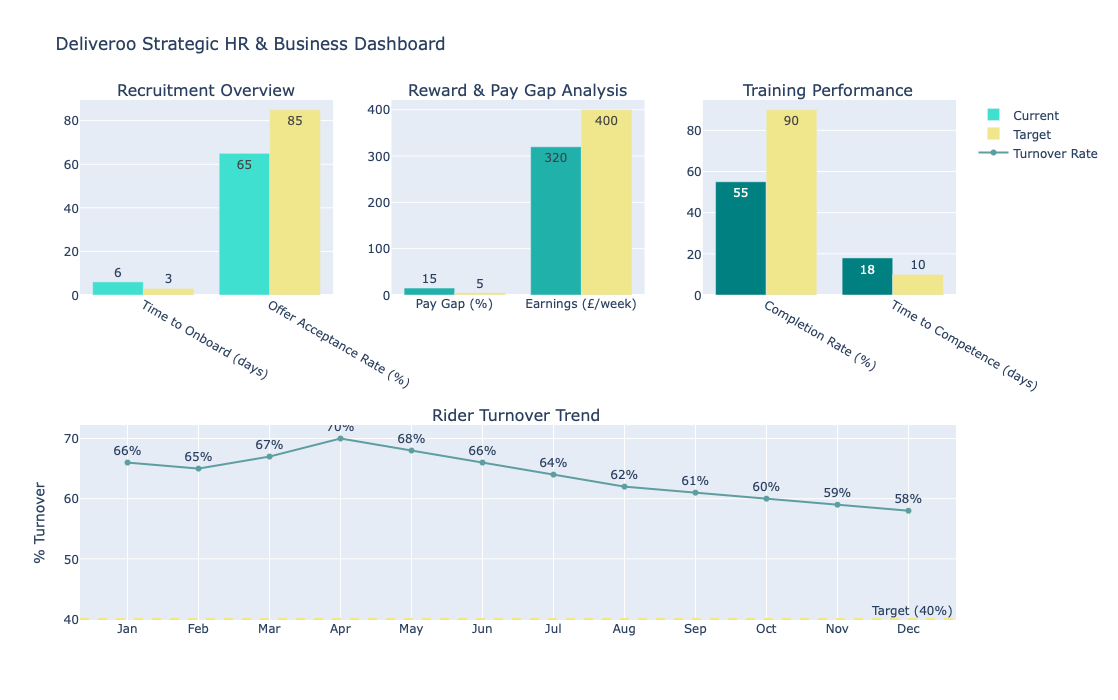

In [134]:
current_colors = ['turquoise', 'lightseagreen', 'teal']
target_color = 'khaki'
col = 1
for idx, (title, metrics) in enumerate(kpi_sections.items()):
    x = list(metrics.keys())
    current = [metrics[m][0] for m in x]
    target = [metrics[m][1] for m in x]
    fig.add_trace(go.Bar(x=x, y=current, marker_color=current_colors[idx], offsetgroup=col,
                         text=[f"{val}" for val in current], textposition='auto', showlegend=(col==1), name='Current'), row=1, col=col)
    fig.add_trace(go.Bar(x=x, y=target, marker_color=target_color, offsetgroup=col+0.1,
                         text=[f"{val}" for val in target], textposition='auto', showlegend=(col==1), name='Target'), row=1, col=col)
    col += 1

fig.add_trace(go.Scatter(
    x=data['Month'],
    y=data['Turnover Rate (%)'],
    mode='lines+markers+text',
    name='Turnover Rate',
    marker=dict(color='cadetblue'),
    text=[f"{val}%" for val in data['Turnover Rate (%)']],
    textposition="top center",
    showlegend=True
), row=2, col=1)

fig.add_hline(y=40, line_dash="dash", line_color="khaki",
              annotation_text="Target (40%)", row=2, col=1)

fig.update_layout(
    title_text="Deliveroo Strategic HR & Business Dashboard",
    height=700,
    showlegend=True,
    barmode='group'
)

fig.update_xaxes(title_text="", row=2, col=1)
fig.update_yaxes(title_text="% Turnover", row=2, col=1)

fig.show()